In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os as os
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy.polynomial.polynomial import polyfit
import scipy as sp

In [2]:
Cars = pd.read_csv("cars04.csv")
Cars.columns

Index(['Vehicle Name', 'Hybrid', 'SuggestedRetailPrice', 'DealerCost',
       'EngineSize', 'Cylinders', 'Horsepower', 'CityMPG', 'HighwayMPG',
       'Weight', 'WheelBase', 'Length', 'Width'],
      dtype='object')

In [4]:
Res1 = smf.ols(formula= "Weight ~ CityMPG + HighwayMPG", data=Cars).fit()

In [6]:
print(Res1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     162.2
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           9.83e-45
Time:                        19:12:16   Log-Likelihood:                -1695.4
No. Observations:                 234   AIC:                             3397.
Df Residuals:                     231   BIC:                             3407.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5320.7977    162.981     32.647      0.0

In [7]:
##Create Your Predicted (Regression) Vlaues and True Values (Observations)
pred_val = Res1.fittedvalues.copy()
true_val = Cars["Weight"].values.copy()

In [8]:
residual = true_val - pred_val

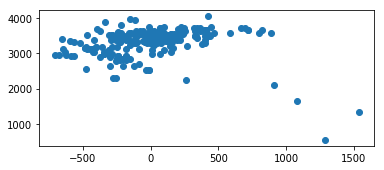

In [9]:
##Residual Plot

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

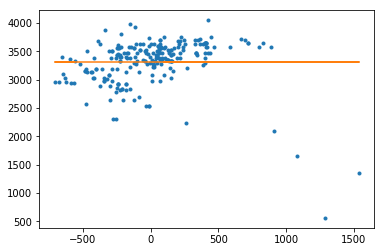

In [10]:
##Residual plot with density line 
##(Usually the one you wanna go with)

x = residual
y = pred_val

b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

0.9532881766431363

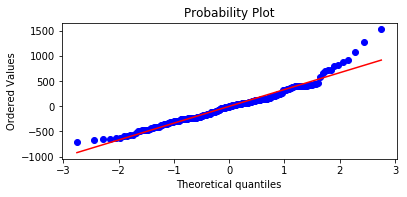

In [11]:
##Normality Plot

fig, ax = plt.subplots(figsize=(6,2.5))
_, (_,_,r) = sp.stats.probplot(residual,plot=ax,fit=True)
r**2

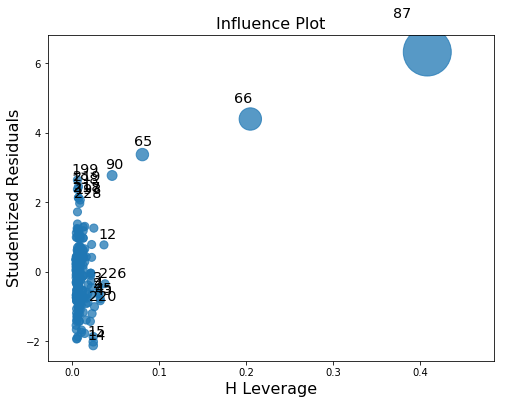

In [12]:
##Inlfuence Plot

fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(Res1, ax=ax)


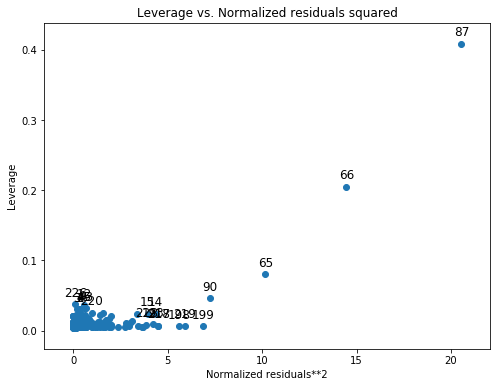

In [13]:
##Leverage (Influence) Plot of squared residuals
##Good for observing in terms of absoulute value
##Overall leverage desipte postive or negative error

fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(Res1, ax=ax)